In [1]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

#IMPORTING DATASET
# Importing the dataset
dataset = pd.read_csv('C:/Users/miant/Desktop/Python/50_Startups.csv')



In [3]:
dataset.head()
#head means the first values of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [6]:
value_counts = dataset['State'].value_counts()
relative_frequencies = value_counts/len(dataset) #length

relative_frequencies

New York      0.34
California    0.34
Florida       0.32
Name: State, dtype: float64

In [7]:
#We create the subtable to find the relative frequency

subtable = pd.DataFrame({'State': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

,State,Frequency,Relative Frequency
0,New York,17,0.34
1,California,17,0.34
2,Florida,16,0.32


In [8]:
mean_adm= dataset['Administration'].mean()
print(mean_adm)

121344.63959999995


In [9]:
median = dataset['Administration'].median()
print(median)

122699.795


In [10]:
mode = dataset['Administration'].mode()
print(mode)

0      51283.14
1      51743.15
2      65947.93
3      82982.09
4      84710.77
5      85047.44
6      91391.77
7      91790.61
8      96189.63
9      99281.34
10     99814.71
11    101145.55
12    103057.49
13    105751.03
14    108679.17
15    110594.11
16    113867.30
17    114175.79
18    115641.28
19    115816.21
20    116983.80
21    118546.05
22    118671.85
23    121597.55
24    122616.84
25    122782.75
26    124153.04
27    127056.21
28    127320.38
29    127382.30
30    127864.55
31    129219.61
32    135426.92
33    135495.07
34    136897.80
35    139553.16
36    144135.98
37    145077.58
38    145530.06
39    147198.87
40    148718.95
41    151377.59
42    152701.92
43    153032.06
44    153514.11
45    153773.43
46    154806.14
47    156547.42
48    157693.92
49    182645.56
dtype: float64


[Text(0.5, 0, 'Adm Spent'),
 Text(0, 0.5, 'Companies'),
 Text(0.5, 1.0, 'Administration Histogram')]

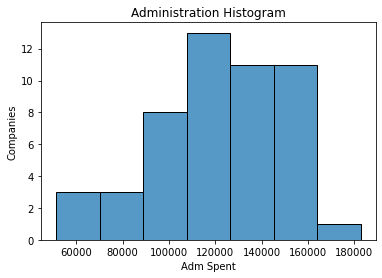

In [11]:
ax = sns.histplot(dataset.Administration)
ax.set(xlabel='Adm Spent', ylabel='Companies', title ='Administration Histogram')

[Text(0.5, 0, 'Adm spent'),
 Text(0, 0.5, 'Companies'),
 Text(0.5, 1.0, 'Administration Histogram')]

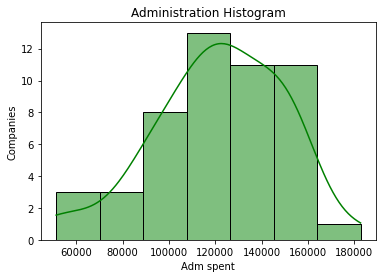

In [12]:
ax = sns.histplot(dataset.Administration, kde=True, color ='green')
ax.set(xlabel='Adm spent', ylabel='Companies', title ='Administration Histogram')

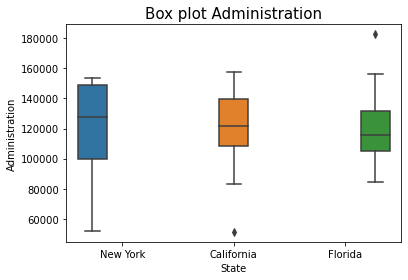

In [13]:
sns.boxplot(x = 'State', y ='Administration', data=dataset, hue = 'State')
plt.title('Box plot Administration', fontsize=15)
plt.legend([], [], frameon=False)
plt.show()

In [14]:
data_locations = dataset.groupby('State', axis = 0).sum()
data_locations


,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,1099180.46,2052690.62,3103195.80,1766387.98
Florida,1291584.26,1948302.36,3957176.82,1900384.39
New York,1295316.06,2066239.00,3490882.27,1933859.59


In [15]:
data_locations.reset_index(inplace=True)

In [16]:
#rename columns
data_locations.columns = ['State', 'R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

In [17]:
data_locations

,State,R&D Spend,Administration,Marketing Spend,Profit
0,California,1099180.46,2052690.62,3103195.80,1766387.98
1,Florida,1291584.26,1948302.36,3957176.82,1900384.39
2,New York,1295316.06,2066239.00,3490882.27,1933859.59


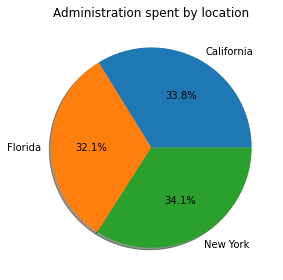

In [18]:
locations = ['California', 'Florida', 'New York']
data_locations['Administration'].plot(kind='pie', labels = locations, radius=1, autopct='%1.1f%%', shadow = True)
plt.title('Administration spent by location')
plt.ylabel("")
plt.tight_layout()

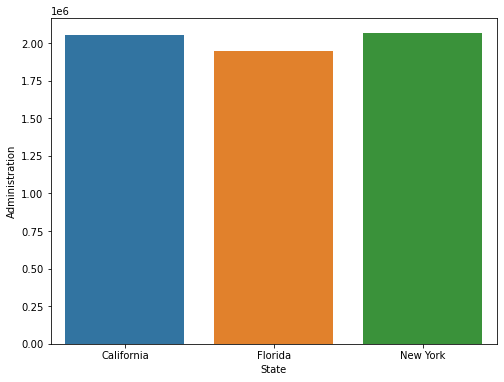

In [19]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="State", y="Administration", data=data_locations)